## Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import scipy.stats as stats
from scipy.stats import chisquare
import statsmodels.api as sm
from scipy.stats import pearsonr, norm, ttest_ind

In [2]:
filename="cleaned_marijuana_data.csv"
df = pd.read_csv(filename, index_col=0)
df.head()

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,PER_YEAR,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
0,83732.0,1.0,62.0,NaN,5.0,1.0,NaN,10.0,4.39,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,83733.0,1.0,53.0,NaN,3.0,3.0,NaN,4.0,1.32,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,83735.0,2.0,56.0,NaN,5.0,6.0,NaN,10.0,5.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,83736.0,2.0,42.0,NaN,4.0,3.0,1.0,7.0,1.23,5.0,...,1.0,25.0,5.0,1.0,25.0,0.0,4.0,1.0,30.0,2.0
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.0,2.0,1.0,25.0,0.0


## Single-variable analysis

## INCOME

In [3]:
income_labels = ['0-4.9', '5-9.9', '10-14.9','15-19.9', '20-24.9', '25-34.9', '35-44.9', '45-54.9','55-64.9','65-74.9','75-99', '100+']

In [4]:
# remove unknown, missing, and cummulative values
df.drop(df[(df['INCOME']==7777) | (df['INCOME']==9999) | (df['INCOME']==12) | (df['INCOME']==13)].index, inplace=True)

Text(0, 0.5, 'number of individuals')

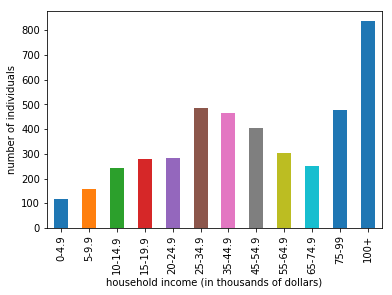

In [5]:
df['INCOME'].value_counts().sort_index().plot(kind='bar')
plt.xticks(np.arange(12),income_labels)
plt.xlabel("household income (in thousands of dollars)")
plt.ylabel("number of individuals")

## FIRST USAGE

Text(0, 0.5, 'number of individuals')

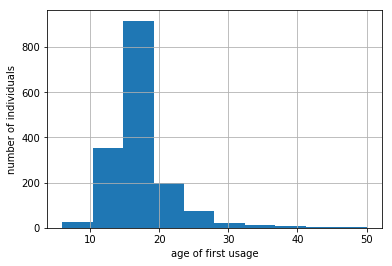

In [6]:
df['FIRST_USAGE'].hist()
plt.xlabel("age of first usage")
plt.ylabel("number of individuals")

## AMOUNT

In [7]:
# remove unknown, missing, and cummulative values
df.drop(df[(df['AMOUNT']==7777) | (df['AMOUNT']==9999)].index, inplace=True)
amount_labels = ['1/day', '2/day', '3-5/day', '>6/day']

Text(0, 0.5, 'number of individuals')

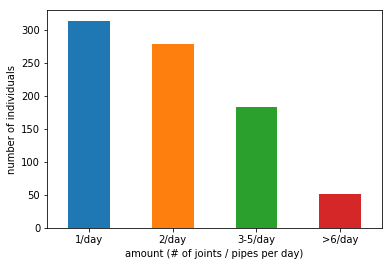

In [8]:
df['AMOUNT'].value_counts().sort_index().plot(kind='bar')
plt.xticks(np.arange(4),amount_labels, rotation='horizontal')
plt.xlabel("amount (# of joints / pipes per day)")
plt.ylabel("number of individuals")

## FREQUENCY

In [9]:
# remove unknown, missing, and cummulative values
df.drop(df[(df['FREQUENCY']==7777) | (df['FREQUENCY']==9999)].index, inplace=True)
freq_labels=['1/month','2-3/month','4-8/month','9-24/month','25-30/month']

Text(0, 0.5, 'number of individuals')

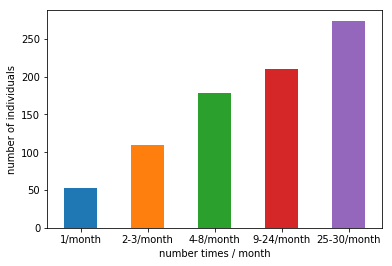

In [10]:
df['FREQUENCY'].value_counts().sort_index().plot(kind='bar')
plt.xticks(np.arange(5),freq_labels, rotation='horizontal')
plt.xlabel("number times / month")
plt.ylabel("number of individuals")

## INCOME RATIO

Ratio of family income to poverty. Calculated according to the Department of Health and Human Services guidelines, which vary according to state, number of individuals in the family/household, and poverty threshold defined for the year.

$$\text{Ratio of family income to povery} = \frac{\text{family income}}{\text{poverty threshold income}}$$



Text(0, 0.5, 'number of individuals')

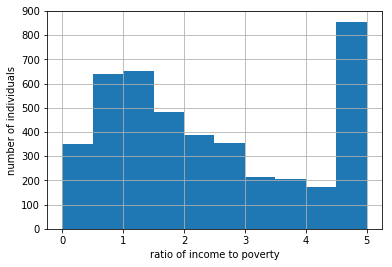

In [11]:
df['INCOME_RATIO'].hist()
plt.xlabel("ratio of income to poverty")
plt.ylabel("number of individuals")

## Data Subsets

In [12]:
min_age = df['AGE'].min()
max_age = df['AGE'].max()
min_age, max_age


(18.0, 69.0)

In [13]:
# subsetting data by hypothesis groups
# Group 1 : Young people (defined as 26 or younder)
df_y = df[df['AGE'] <= 26]
# Group 2 : Aged over 50
df_s = df[df['AGE'] >= 65]
df_s.isnull().sum()


ID                    0
GENDER                0
AGE                   0
EDUCATION_KID       372
EDUCATION_ADULT       0
MARRIAGE              0
PREGNANCY           372
INCOME               20
INCOME_RATIO         20
HOUSEHOLD_NUM         0
OVER_60_NUM           0
EVER_USE            372
FIRST_USAGE         372
FREQUENCY           372
PER_MONTH           372
PER_YEAR            372
LAST_ONCE_MONTH     372
AMOUNT              372
LAST_USAGE          372
PAST_MONTH_USAGE    372
CHILDREN_NUM          0
dtype: int64

### INCOME v. INCOME_RATIO

Text(0.5, 1.0, 'Household Income and Ratio of Income to Poverty')

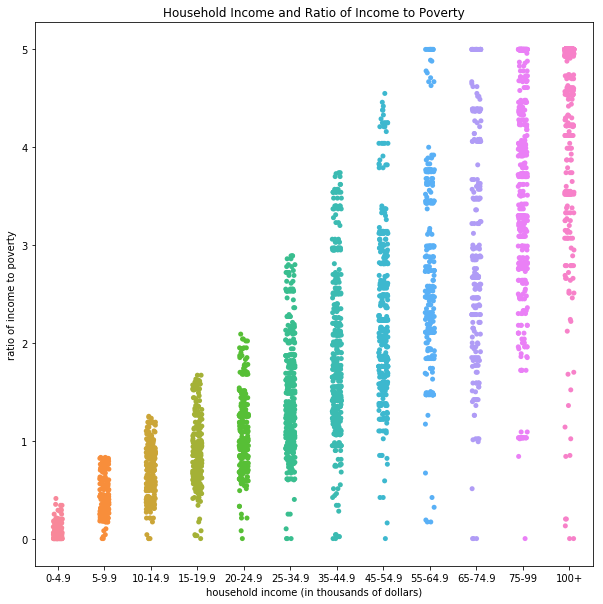

In [14]:
plt.figure(figsize=(10,10))
sns.stripplot(x='INCOME', y='INCOME_RATIO', data=df)
plt.xticks(np.arange(12),income_labels)
plt.xlabel("household income (in thousands of dollars)")
plt.ylabel("ratio of income to poverty")
plt.title("Household Income and Ratio of Income to Poverty")

Text(0.5, 1.0, 'Household Income and Ratio of Income to Poverty for Group 1 (aged 26 or younger)')

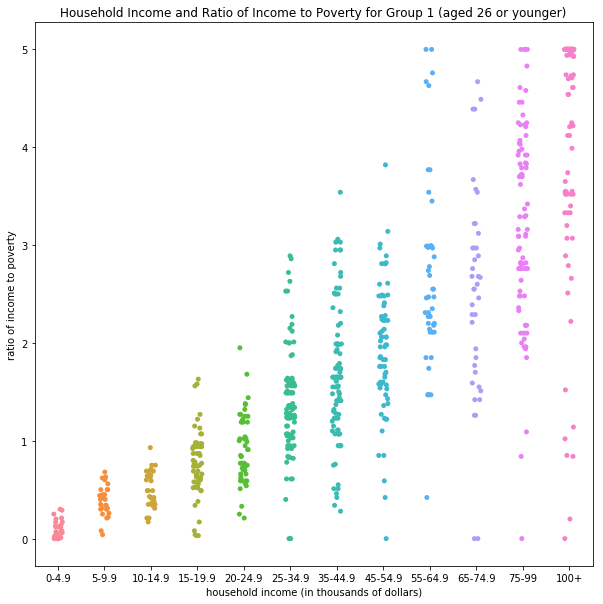

In [15]:
plt.figure(figsize=(10,10))
sns.stripplot(x='INCOME', y='INCOME_RATIO', data=df_y)
plt.xticks(np.arange(12),income_labels)
plt.xlabel("household income (in thousands of dollars)")
plt.ylabel("ratio of income to poverty")
plt.title("Household Income and Ratio of Income to Poverty for Group 1 (aged 26 or younger)")

Text(0.5, 1.0, 'Comparision of Household Income and Ratio of Income to Poverty for Group 2 (aged 50 or older)')

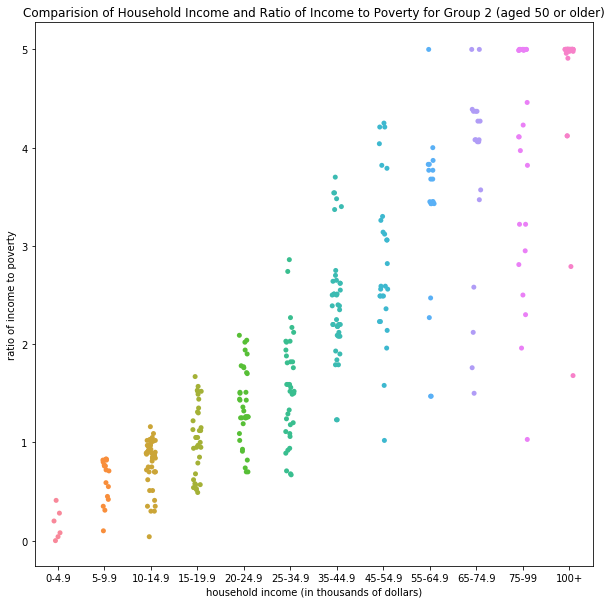

In [16]:
plt.figure(figsize=(10,10))
sns.stripplot(x='INCOME', y='INCOME_RATIO', data=df_s)
plt.xticks(np.arange(12),income_labels)
plt.xlabel("household income (in thousands of dollars)")
plt.ylabel("ratio of income to poverty")
plt.title("Comparision of Household Income and Ratio of Income to Poverty for Group 2 (aged 50 or older)")

## INCOME V. FIRST_USAGE

### Group 1:  26 or younger

Text(0.5, 1.0, 'Household Income and Age of first usage for Group 1 (aged 26 or younger)')

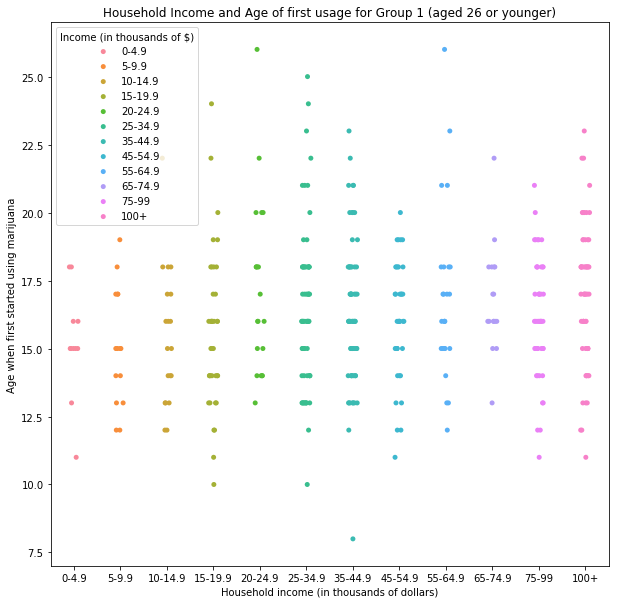

In [17]:
plt.figure(figsize=(10,10))
sns.stripplot(x='INCOME', y='FIRST_USAGE', data=df_y)
plt.xticks(np.arange(12),income_labels)
plt.xlabel("Household income (in thousands of dollars)")
plt.ylabel("Age when first started using marijuana")
plt.legend(income_labels, title='Income (in thousands of $)', loc='best')
plt.title("Household Income and Age of first usage for Group 1 (aged 26 or younger)")

### Group 2: 65 or older

Text(0.5, 1.0, 'Household Income and Age of first usage for Group 2 (aged 50 or older)')

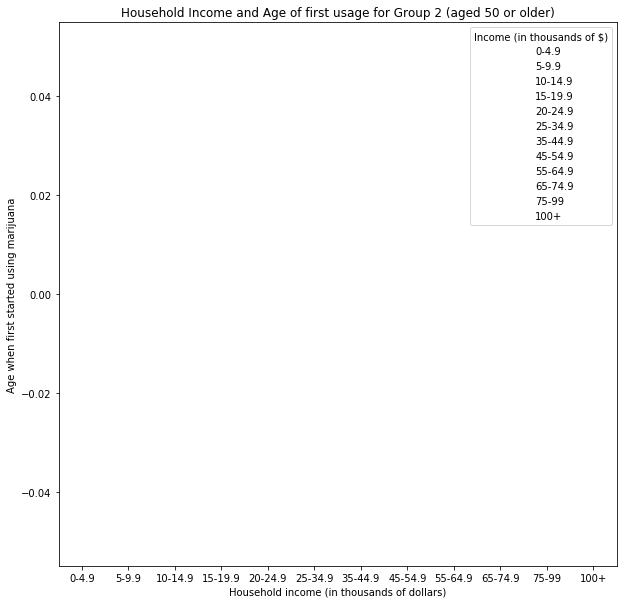

In [18]:
plt.figure(figsize=(10,10))
sns.stripplot(x='INCOME', y='FIRST_USAGE', data=df_s)
plt.xticks(np.arange(12),income_labels)
plt.xlabel("Household income (in thousands of dollars)")
plt.ylabel("Age when first started using marijuana")
plt.legend(income_labels, title='Income (in thousands of $)', loc='best')
plt.title("Household Income and Age of first usage for Group 2 (aged 50 or older)")

### INCOME_RATIO v. FIRST_USAGE 

In [19]:
#functions for converting from numerical to categorical data
def num_to_category(num_val, data_dict):
    if num_val in data_dict.keys():
        return data_dict[num_val]
    else:
        return np.nan
    
# GENDER
df['GENDER']
gender_dict = {1:'MALE',2:'FEMALE'}
df['GENDER']=df['GENDER'].apply(num_to_category, data_dict=gender_dict)
df_y['GENDER']=df_y['GENDER'].apply(num_to_category, data_dict=gender_dict)
df_s['GENDER']=df_s['GENDER'].apply(num_to_category, data_dict=gender_dict)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


### Group 1: 26 or younger

Text(0.5, 1.0, 'Ratio of Income to Poverty and Age of first usage for Group 1 (aged 26 or younger)')

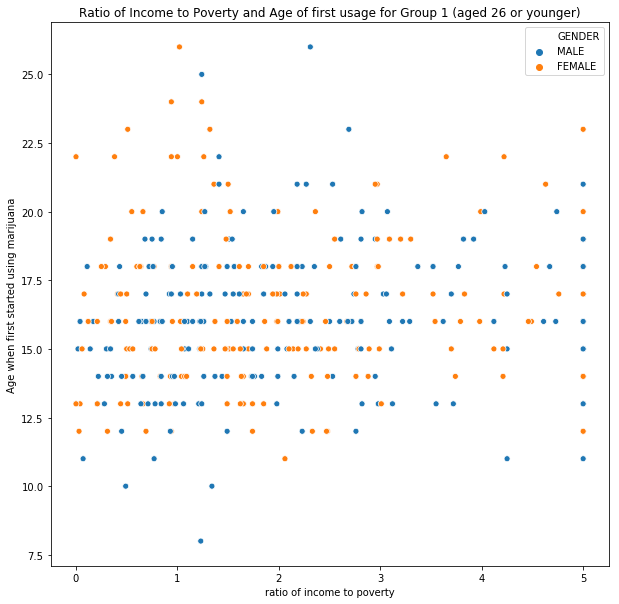

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='INCOME_RATIO',y='FIRST_USAGE', data=df_y, hue='GENDER')
plt.xlabel("ratio of income to poverty")
plt.ylabel("Age when first started using marijuana")
plt.title("Ratio of Income to Poverty and Age of first usage for Group 1 (aged 26 or younger)")

In [21]:
outcome, predictors = patsy.dmatrices('FIRST_USAGE~INCOME_RATIO', df_y)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            FIRST_USAGE   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     7.571
Date:                Wed, 05 Jun 2019   Prob (F-statistic):            0.00620
Time:                        01:19:45   Log-Likelihood:                -979.49
No. Observations:                 409   AIC:                             1963.
Df Residuals:                     407   BIC:                             1971.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       15.7672      0.230     68.575   

In [22]:
#outcome, predictors = patsy.dmatrices('FIRST_USAGE~INCOME_RATIO+GENDER', df_y)
#mod = sm.OLS(outcome, predictors)
#res = mod.fit() 
#print(res.summary())

### Group 2: Older than 65

Text(0.5, 1.0, 'Ratio of Income to Poverty and Age of first usage for Group 2 (aged 50 or older)')

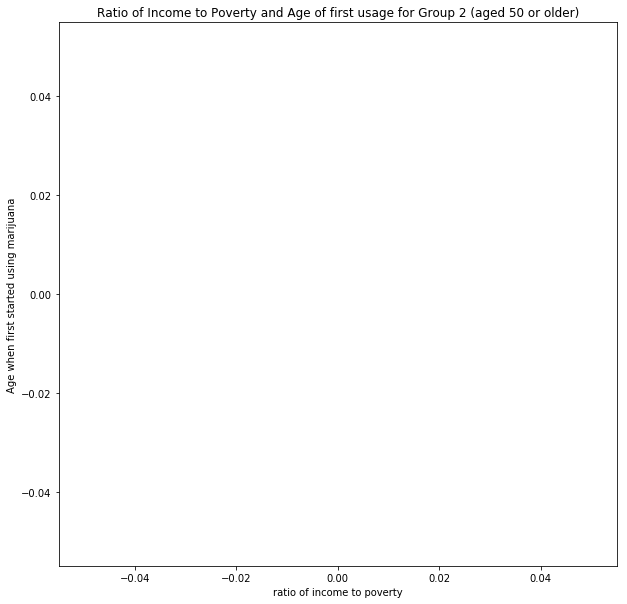

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='INCOME_RATIO',y='FIRST_USAGE', data=df_s, hue='GENDER')
plt.xlabel("ratio of income to poverty")
plt.ylabel("Age when first started using marijuana")
plt.title("Ratio of Income to Poverty and Age of first usage for Group 2 (aged 50 or older)")

In [24]:
#outcome, predictors = patsy.dmatrices('FIRST_USAGE~INCOME_RATIO', df_s)
#mod = sm.OLS(outcome, predictors)
#res = mod.fit() 
#print(res.summary())

In [25]:
df_y[['INCOME','AMOUNT']].head()

,INCOME,AMOUNT
4,7.0,2.0
6,15.0,NaN
14,7.0,NaN
15,1.0,NaN
23,NaN,4.0


### INCOME v. AMOUNT

Text(0, 0.5, 'Amount of marijuana consumed (joints/pipes per day)')

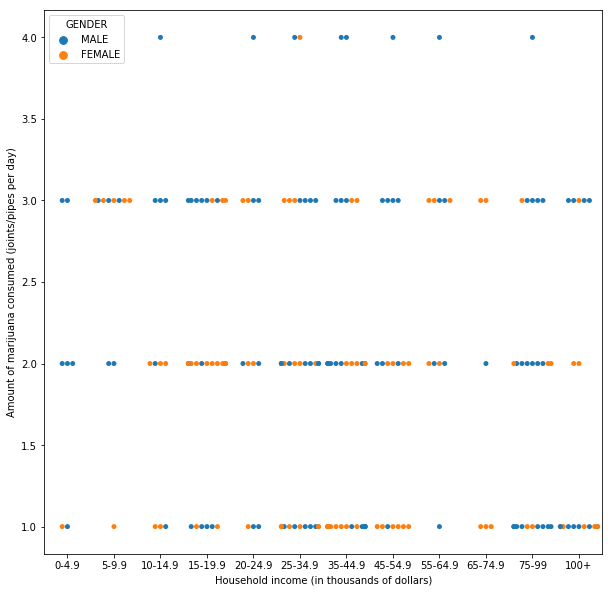

In [26]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='INCOME', y='AMOUNT', data=df_y, hue='GENDER')
plt.xticks(np.arange(12),income_labels)
plt.xlabel("Household income (in thousands of dollars)")
plt.ylabel("Amount of marijuana consumed (joints/pipes per day)")

### INCOME_RATIO v. AMOUNT

Text(0.5, 0, 'Ratio of family income to poverty')

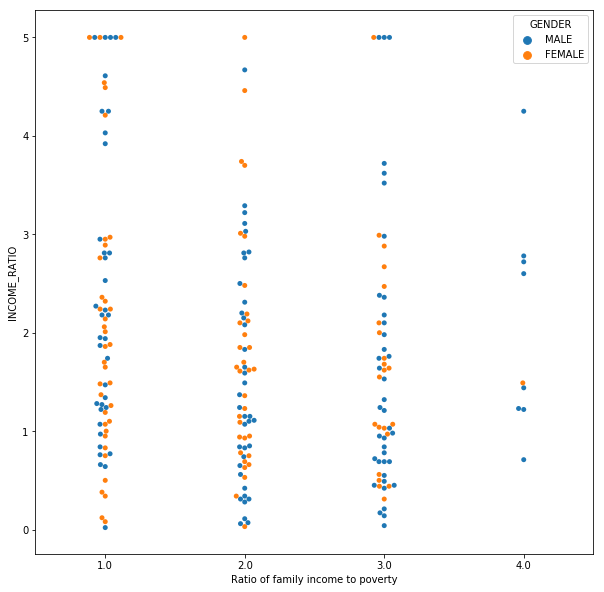

In [27]:
plt.figure(figsize=(10,10))
sns.swarmplot(df_y['AMOUNT'], df_y['INCOME_RATIO'], data=df_y, hue='GENDER')
plt.xlabel("Ratio of family income to poverty")

### INCOME v. FREQUENCY

Text(0.5, 0, 'Household income (in thousands of dollars)')

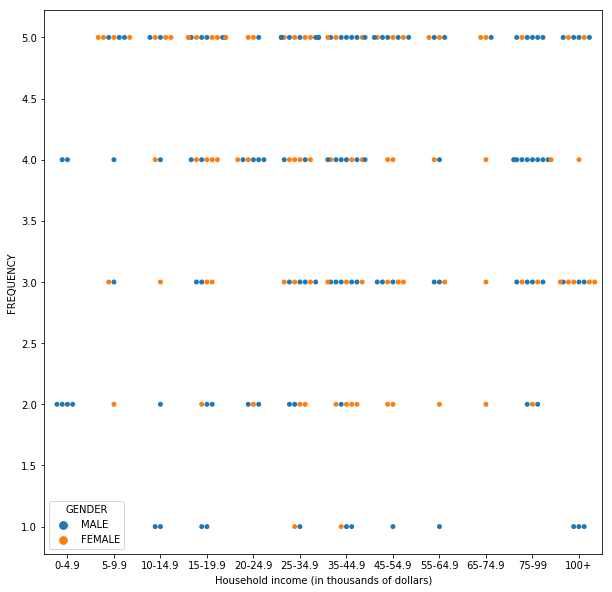

In [28]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='INCOME', y='FREQUENCY', data=df_y, hue='GENDER')
plt.xticks(np.arange(12),income_labels)
plt.xlabel("Household income (in thousands of dollars)")

### INCOME_RATIO v. FREQUENCY

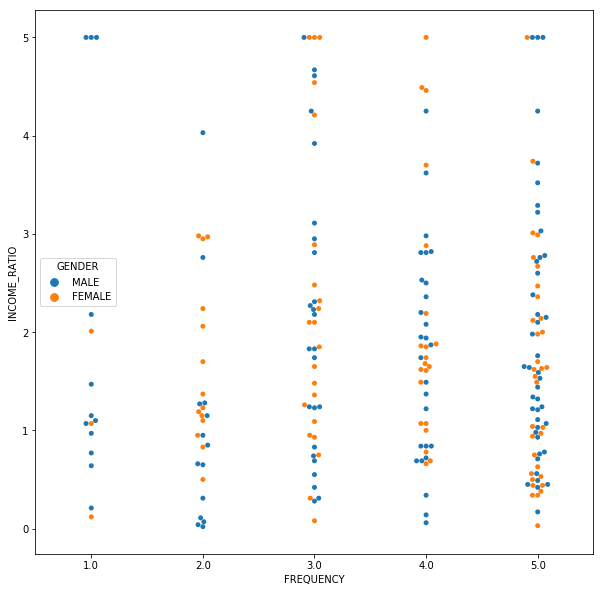

In [29]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='FREQUENCY', y='INCOME_RATIO',data=df_y, hue='GENDER')

### SOCIOECONOMIC STATUS: ANALYSIS OF INCOME BRACKETS

### INCOME RATIO V. FIRST_USAGE

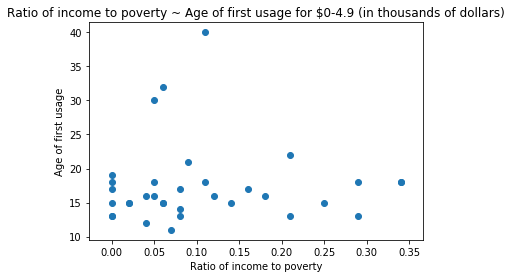

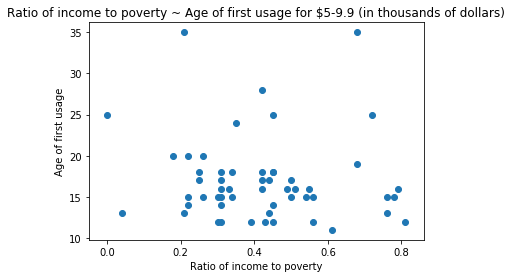

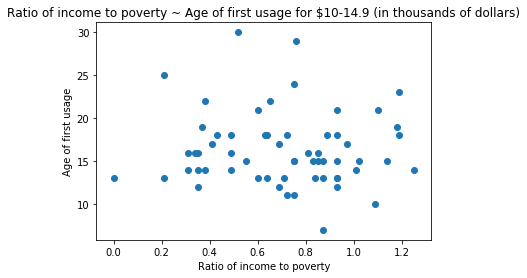

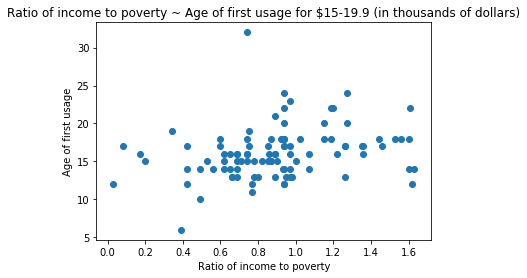

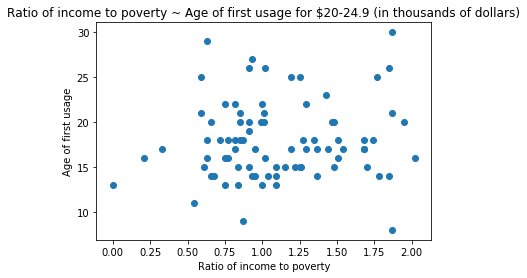

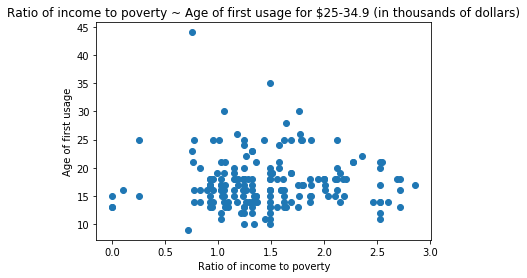

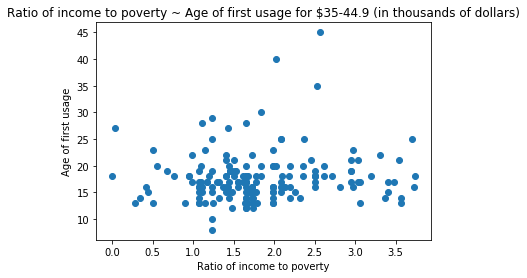

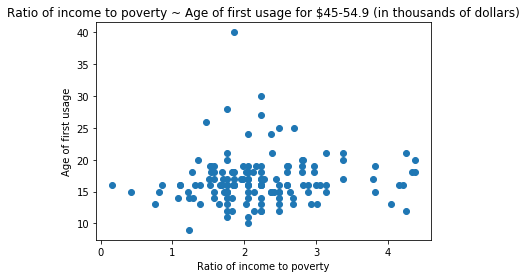

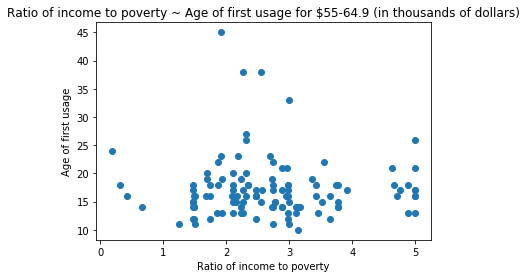

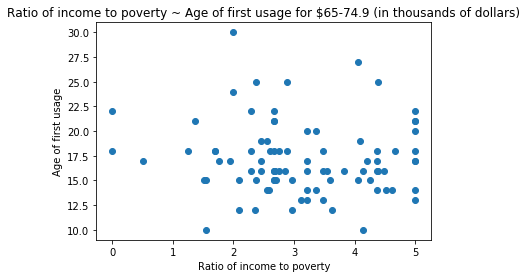

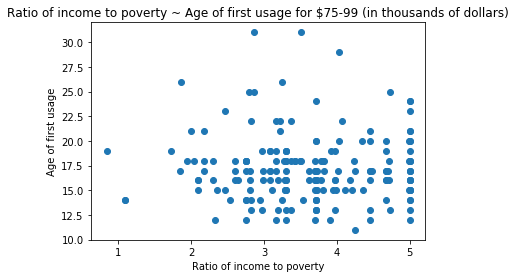

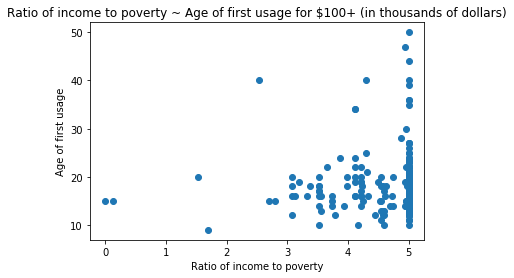

In [30]:
income_vals = df['INCOME'].value_counts().sort_index().index
income_dict={1:'0-4.9', 2:'5-9.9', 3:'10-14.9',4:'15-19.9', 5:'20-24.9', 6:'25-34.9', 7:'35-44.9', 8:'45-54.9',9:'55-64.9',10:'65-74.9',14:'75-99', 15:'100+'}
for i in income_vals:
    df_i = df[df['INCOME']==i]
    plt.figure()
    plt.scatter(df_i['INCOME_RATIO'],df_i['FIRST_USAGE'])
    plt.xlabel("Ratio of income to poverty")
    plt.ylabel("Age of first usage")
    plt.title("Ratio of income to poverty ~ Age of first usage for $" + income_dict[i] + " (in thousands of dollars)")
    plt.show()

### INCOME_RATIO V.  FREQUENCY

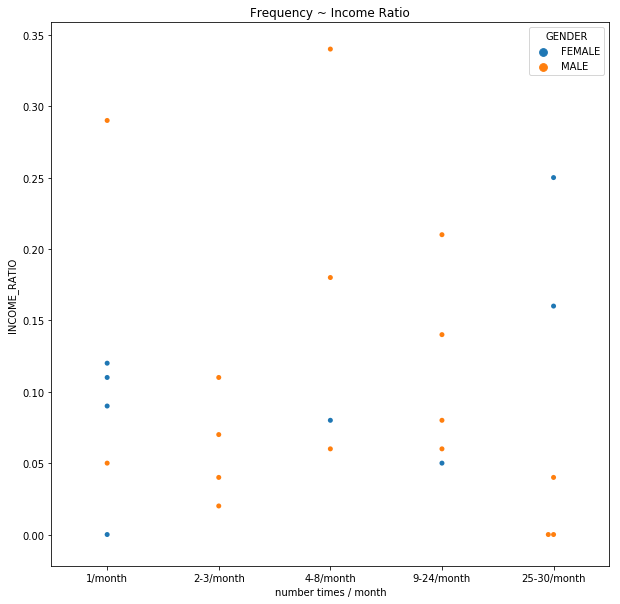

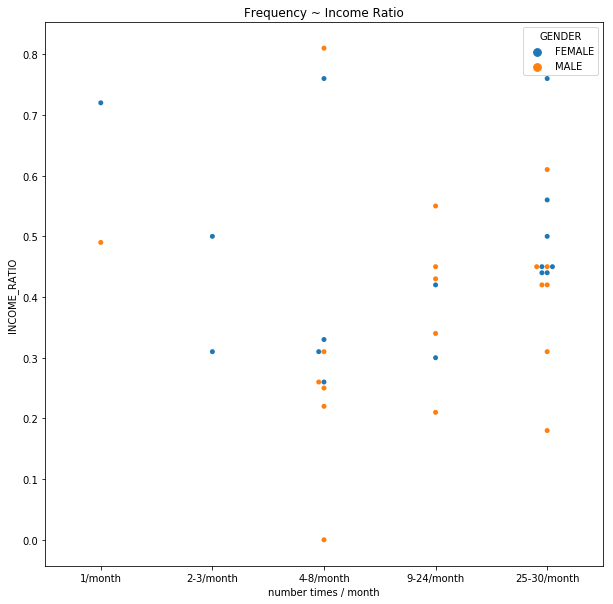

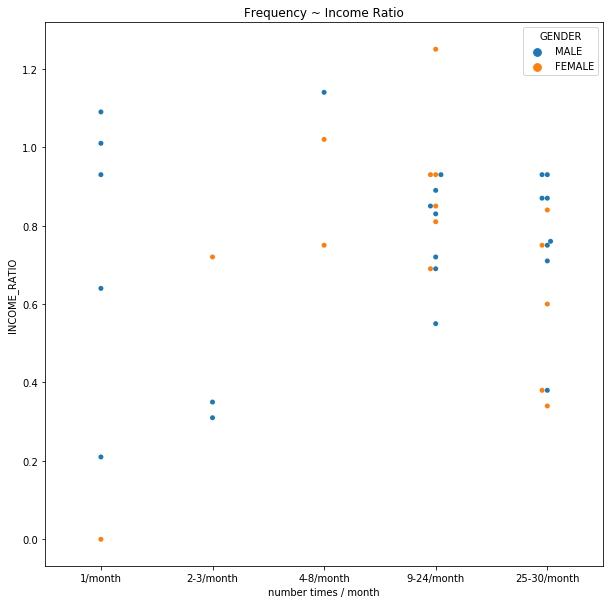

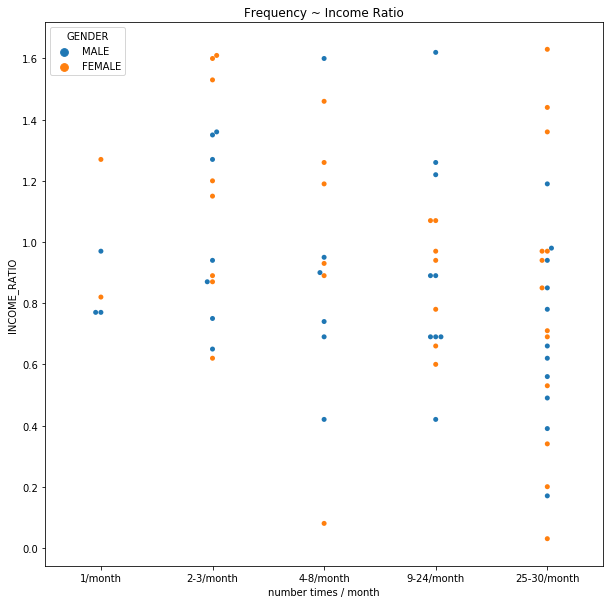

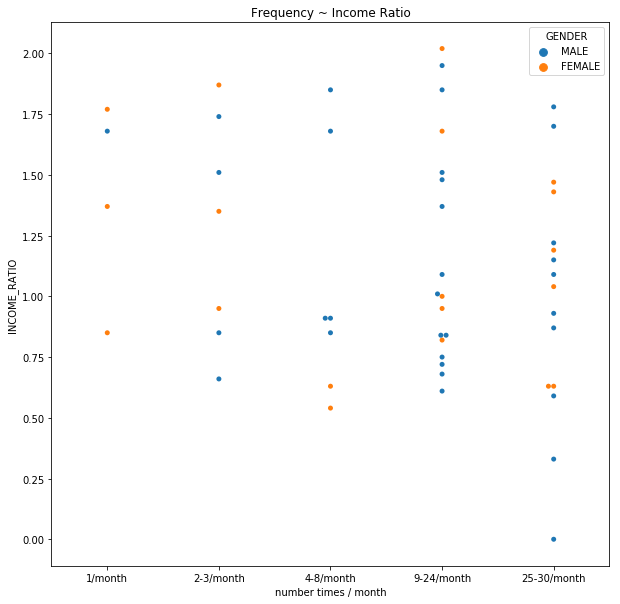

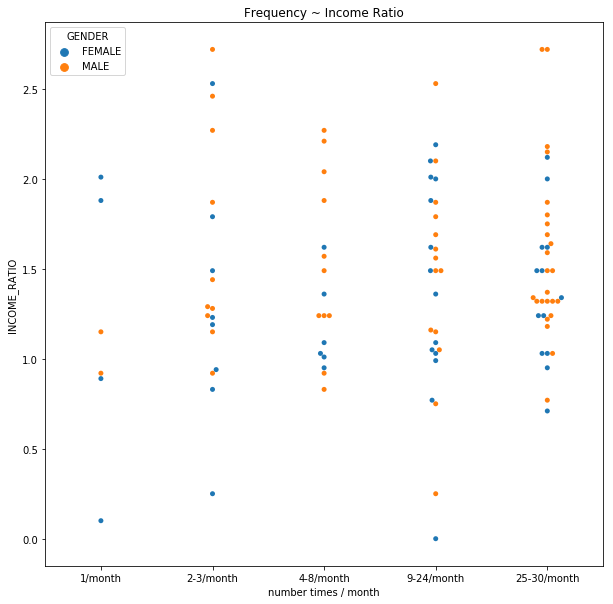

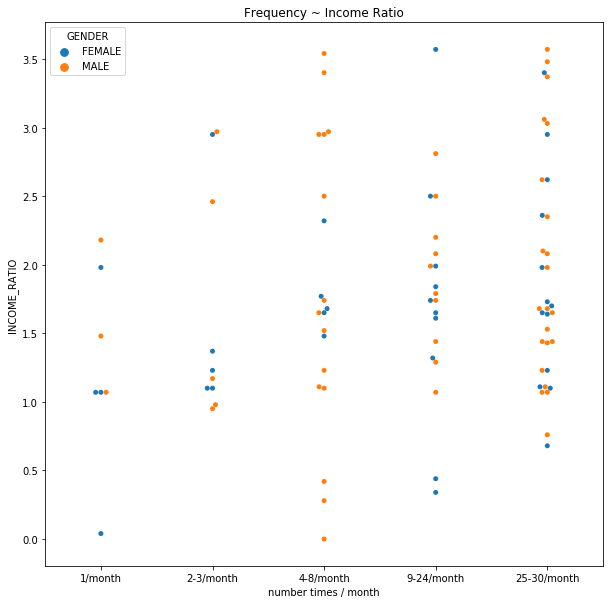

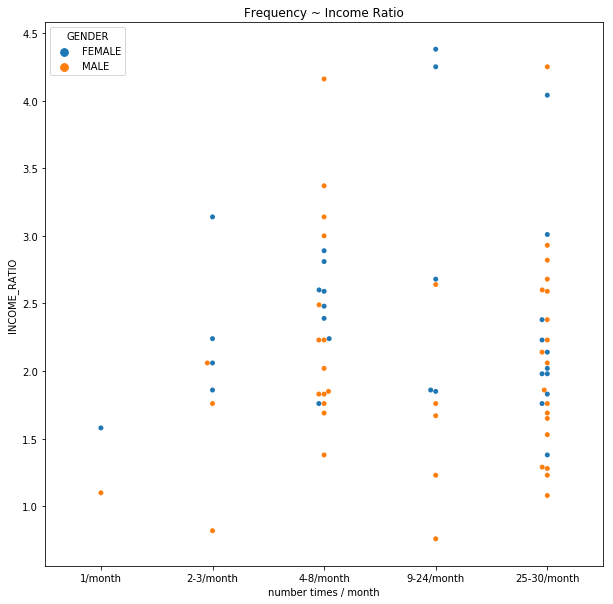

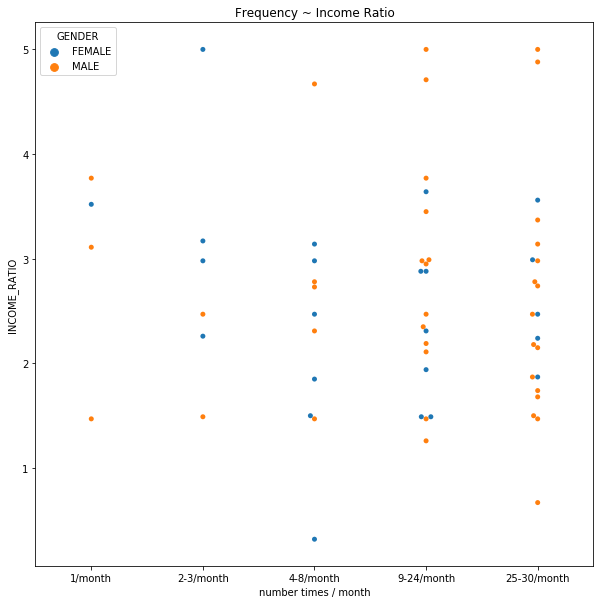

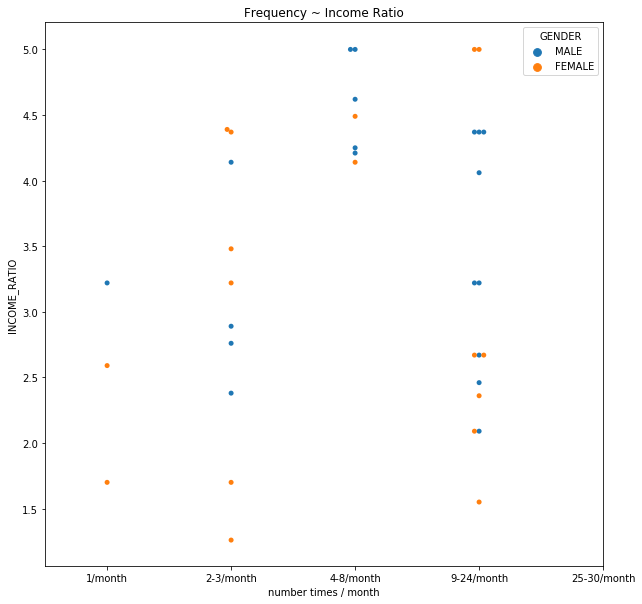

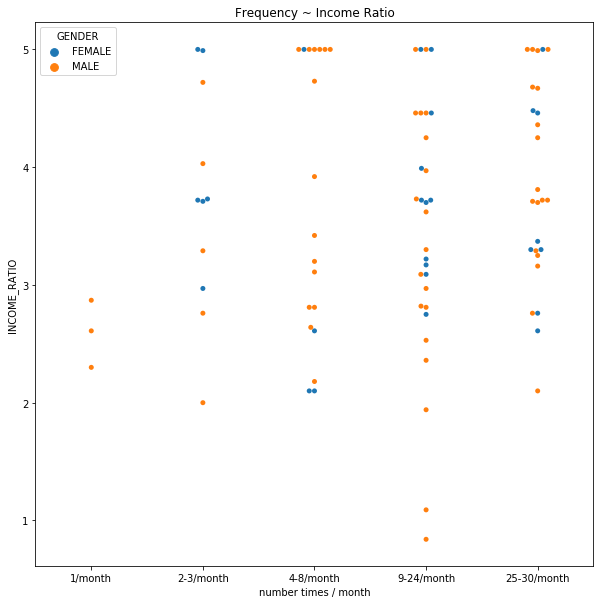

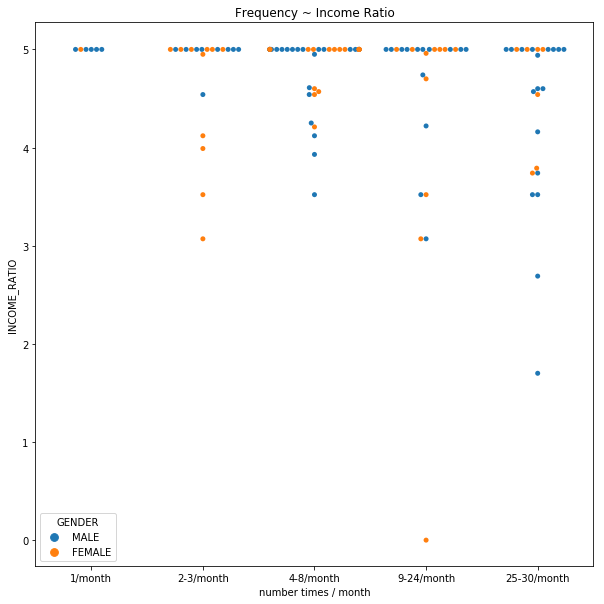

In [31]:
for i in income_vals:
    df_i = df[df['INCOME']==i]
    plt.figure(figsize=(10,10))
    sns.swarmplot(x='FREQUENCY', y='INCOME_RATIO',data=df_i, hue='GENDER')
    plt.xticks(np.arange(5),freq_labels, rotation='horizontal')
    plt.xlabel("number times / month")
    plt.title("Frequency ~ Income Ratio")

### INCOME_RATIO V. AMOUNT

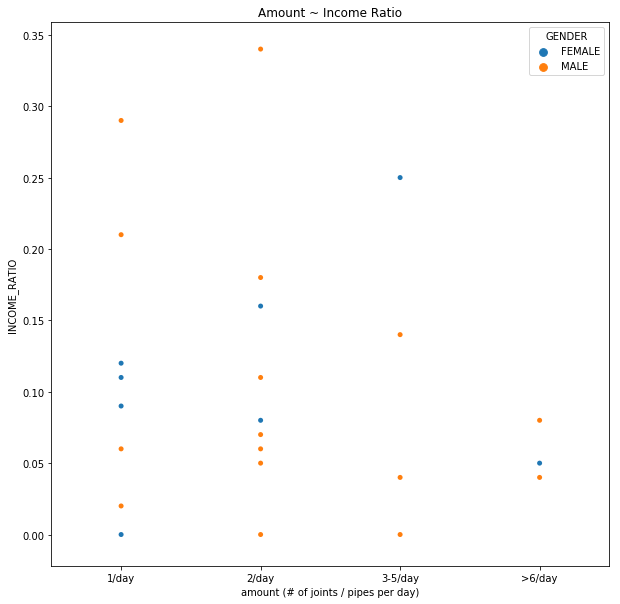

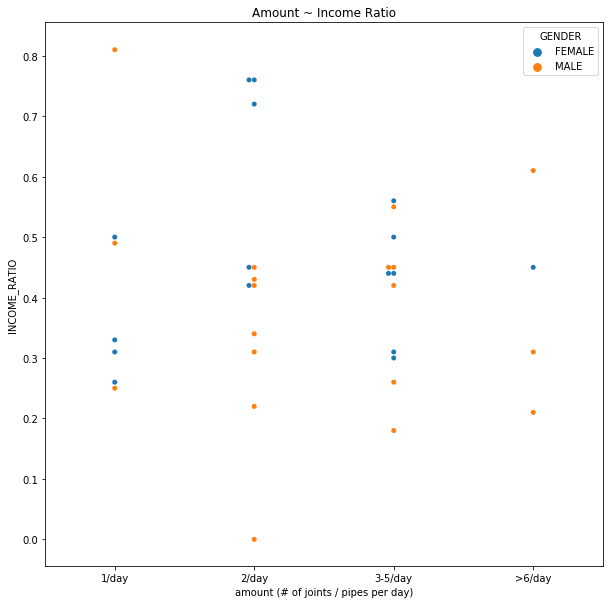

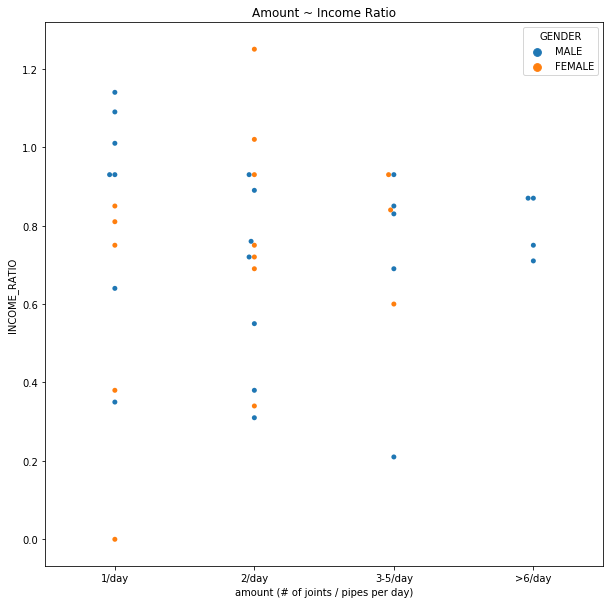

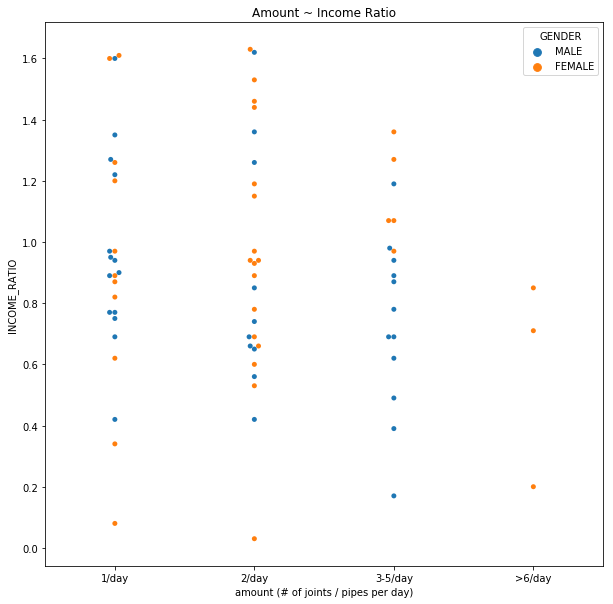

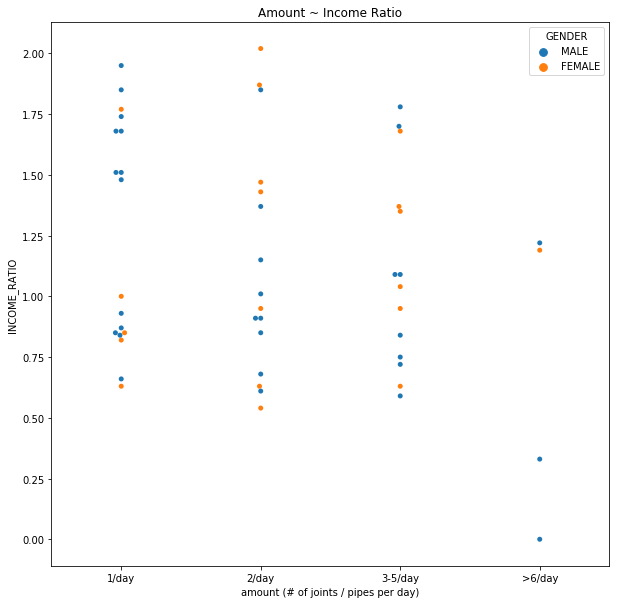

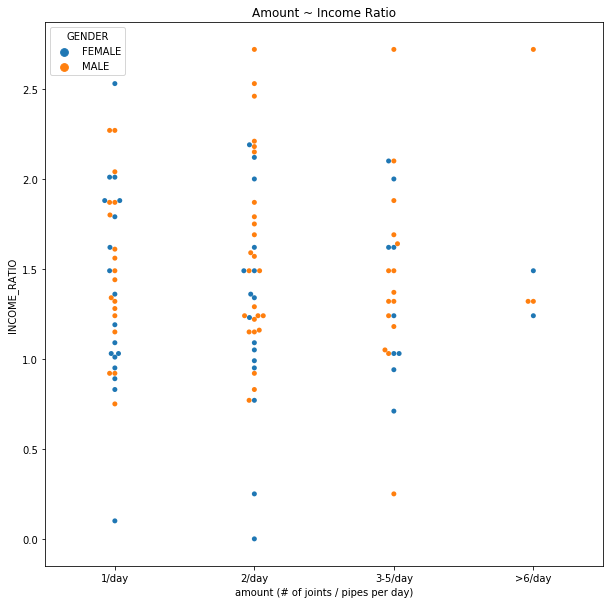

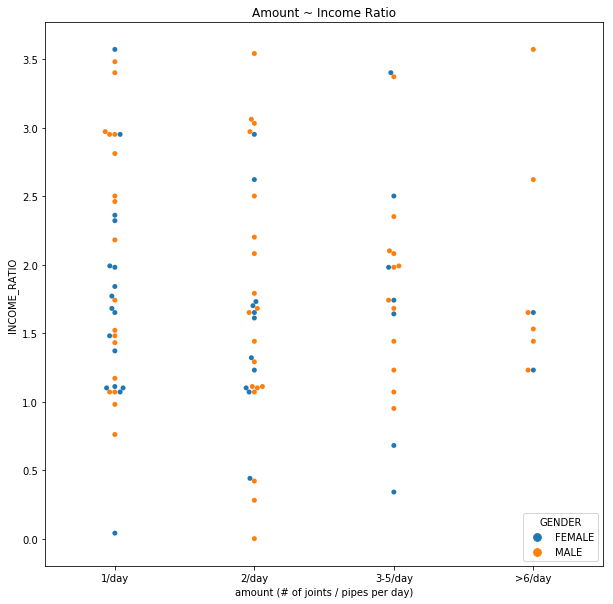

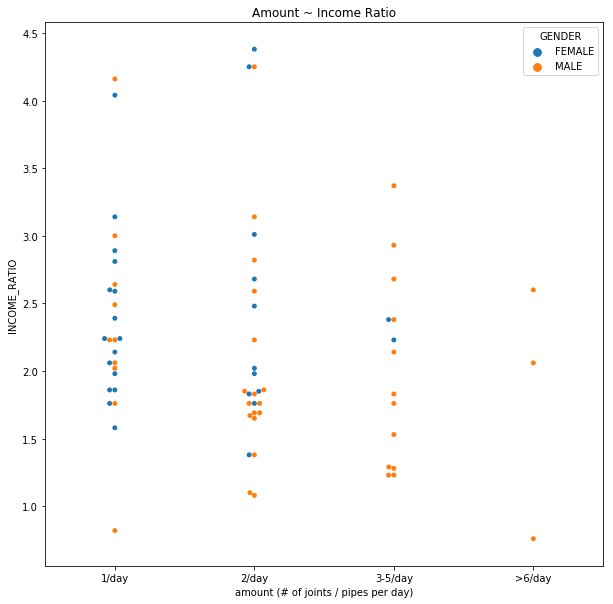

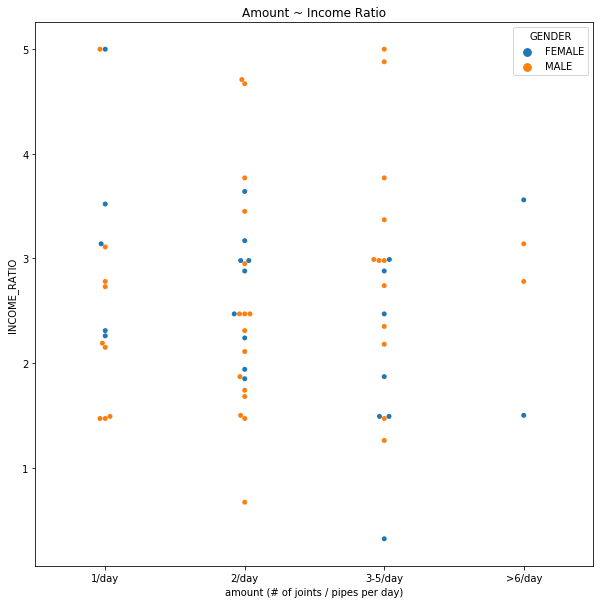

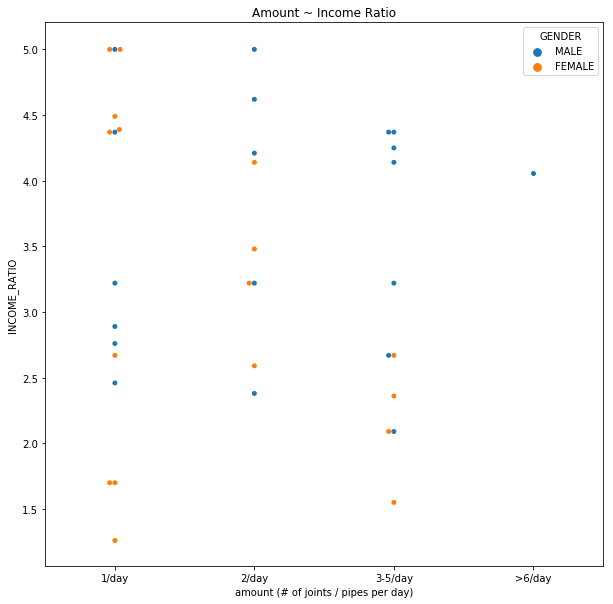

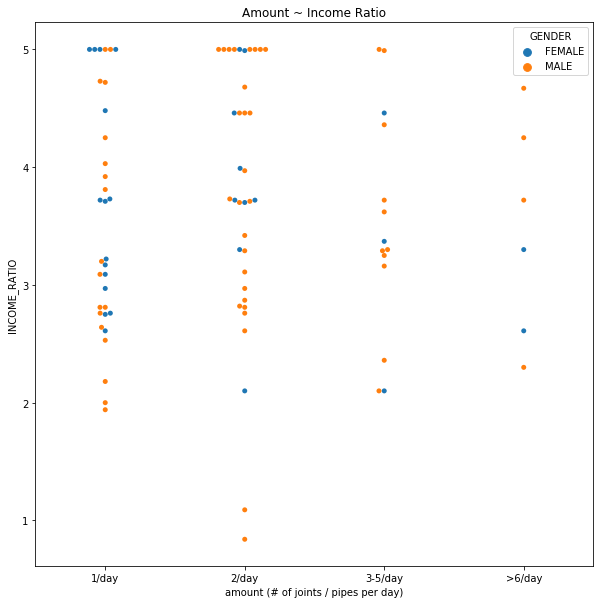

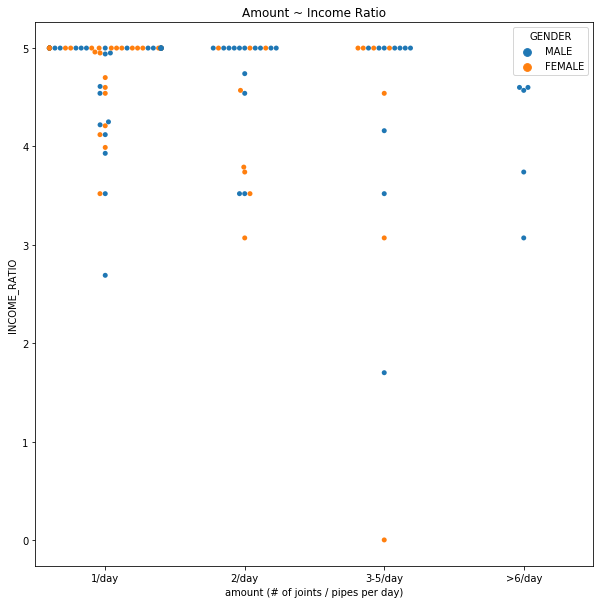

In [32]:
for i in income_vals:
    df_i = df[df['INCOME']==i]
    plt.figure(figsize=(10,10))
    sns.swarmplot(x='AMOUNT', y='INCOME_RATIO',data=df_i, hue='GENDER')
    plt.xticks(np.arange(4),amount_labels, rotation='horizontal')
    plt.xlabel("amount (# of joints / pipes per day)")
    plt.title("Amount ~ Income Ratio")